In [26]:
import tskit
import numpy as np

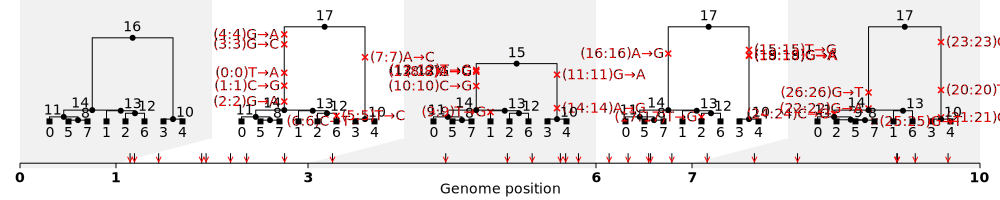

In [193]:
ts = tskit.load("../trees/case5.tree")
# ts = tskit.load("../trees/case4.tree")
# ts = tskit.load("../trees/case3.tree")
# ts = tskit.load("../trees/case2.tree")
# ts = tskit.load("../tree-simple-1.tree")
# ts = tskit.load("../test.tree")

mut_labels = {}  # An array of labels for the mutations
for mut in ts.mutations():  # Make pretty labels showing the change in state
    site = ts.site(mut.site)
    older_mut = mut.parent >= 0  # is there an older mutation at the same position?
    prev = ts.mutation(mut.parent).derived_state if older_mut else site.ancestral_state
    mut_labels[mut.id] = f"({mut.site}:{mut.id}){prev}→{mut.derived_state}"

ts.draw_svg(mutation_labels=mut_labels)

In [74]:
ts.num_mutations + ts.num_sites

10

In [84]:
sitemuts = []
for site in ts.sites():
    m = 0
    sitemuts.append((site.id, m))
    m += 1
    for mut in site.mutations:
        sitemuts.append((site.id, m))
        m += 1

In [85]:
len(sitemuts)

10

In [87]:
from itertools import combinations_with_replacement

In [95]:
sitemuts

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (2, 0),
 (2, 1),
 (3, 0),
 (3, 1)]

In [191]:
list(get_samples_from_array([255], 1))

[0, 1, 2, 3, 4, 5, 6, 7]

In [192]:
list(get_samples_from_array([24], 1))

[3, 4]

In [106]:
 for s1, s2 in list(combinations_with_replacement(range(ts.num_sites), 2)):
    for m1 in range(len(ts.site(s1).mutations) + 1):
        for m2 in range(len(ts.site(s2).mutations) + 1):
            print(sitemuts.index((s1, m1)), sitemuts.index((s2, m2)))
            # print('(', s1, m1, ')', '(', s2, m2, ')', '-', sitemuts.index((s1, m1)), sitemuts.index((s2, m2)))

0 0
0 1
0 2
0 3
1 0
1 1
1 2
1 3
2 0
2 1
2 2
2 3
3 0
3 1
3 2
3 3
0 4
0 5
1 4
1 5
2 4
2 5
3 4
3 5
0 6
0 7
1 6
1 7
2 6
2 7
3 6
3 7
0 8
0 9
1 8
1 9
2 8
2 9
3 8
3 9
4 4
4 5
5 4
5 5
4 6
4 7
5 6
5 7
4 8
4 9
5 8
5 9
6 6
6 7
7 6
7 7
6 8
6 9
7 8
7 9
8 8
8 9
9 8
9 9


In [109]:
sitemuts[9]

(3, 1)

In [49]:
# curr_
# for n in postorder_traversal(8, left_child, right_child):
#     if ts.node(n).flag & 1:

In [12]:
# stack = [17]
# while stack:
#     node = stack.pop()
#     print(node)
#     u = right_child[node]
#     while u != tskit.NULL:
#         stack.append(u)
#         u = left_sib[u]

In [14]:
t_idx = 0

node_to_mut = dict()
for i, row in enumerate(ts.at_index(t_idx).mutations()):
    node_to_mut.setdefault(row.node, list()).append(i)

stack = [max(node_to_mut)]
mut_stacks = [[] for _ in range(ts.at_index(t_idx).num_mutations)]

# preorder traversal
while stack:
    node = stack.pop()
    if node in node_to_mut:
        for mut in node_to_mut[node]:
            mut_stacks[mut].append(node)
            print('cond0')
            print(mut_stacks)
    for s in mut_stacks:
        if s and (s[-1] == parent[node] or s[-1] == left_sib[node]):
            s.append(node)
            print('cond1')
            print(mut_stacks)
        elif s and s[0] == parent[node]:
            s.append(node)
            print('cond2')
            print(mut_stacks)

    u = right_child[node]
    while u != tskit.NULL:
        print(f'adding {u}')
        stack.append(u)
        u = left_sib[u]
    # if right_child[node] != tskit.NULL:
    #     stack.append(right_child[node])
    # if left_child[node] != tskit.NULL:
    #     stack.append(left_child[node])
    # if right_sib[node] != tskit.NULL:
    #     stack.append(right_sib[node])


# # TODO: can't be a while loop, samples are interleaved :/
# for i in range(len(mut_stacks)):
#     j = len(mut_stacks[i]) - 1
#     print(ts.mutation(i))
#     while ts.node(mut_stacks[i][j]).flags & 1:
#         print(mut_stacks[i][j])
#         j -= 1

cond0
[[9], [], [], []]
adding 7
adding 6
cond1
[[9, 6], [], [], []]
adding 3
adding 2
cond1
[[9, 6, 2], [], [], []]
cond0
[[9, 6, 2], [], [3], []]
cond1
[[9, 6, 2, 3], [], [3], []]
cond0
[[9, 6, 2, 3], [7], [3], []]
cond0
[[9, 6, 2, 3], [7], [3], [7]]
cond2
[[9, 6, 2, 3, 7], [7], [3], [7]]
adding 1
adding 0
cond1
[[9, 6, 2, 3, 7, 0], [7], [3], [7]]
cond1
[[9, 6, 2, 3, 7, 0], [7, 0], [3], [7]]
cond1
[[9, 6, 2, 3, 7, 0], [7, 0], [3], [7, 0]]
cond1
[[9, 6, 2, 3, 7, 0, 1], [7, 0], [3], [7, 0]]
cond1
[[9, 6, 2, 3, 7, 0, 1], [7, 0, 1], [3], [7, 0]]
cond1
[[9, 6, 2, 3, 7, 0, 1], [7, 0, 1], [3], [7, 0, 1]]


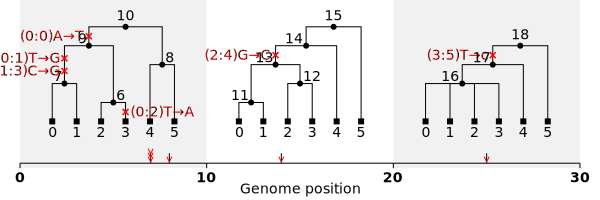

In [122]:
ts.draw_svg(mutation_labels=mut_labels)

In [115]:
mut_stacks

[[9, 6, 2, 3, 7, 0, 1], [7, 0, 1], [3], [7, 0, 1]]

In [153]:
node_to_mut

{9: [0], 7: [1, 3], 3: [2]}

In [154]:
t_idx = 0

node_to_mut = dict()
for i, row in enumerate(ts.at_index(t_idx).mutations()):
    node_to_mut.setdefault(row.node, list()).append(i)

stack = [max(node_to_mut)]
first_curr_node = 2 * -np.ones((ts.at_index(t_idx).num_mutations, 2), dtype=np.int8)
mut_samples = np.zeros((ts.at_index(t_idx).num_mutations, num_sample_chunks), np.uint64)


# preorder traversal
while stack:
    node = stack.pop()
    if node in node_to_mut:
        for mut in node_to_mut[node]:
            first_curr_node[mut, 0] = node
            if ts.node(node).flags & 1:
                add_sample_to_array(mut_samples[mut], np.uint64(node))
            # print('cond0')
            # print(list(map(tuple, first_curr_node)))
    for i, s in enumerate(first_curr_node):
        if s[0] != -2:
            if (s[1] == parent[node] or s[1] == left_sib[node]):
                s[1] = node
                if ts.node(node).flags & 1:
                    add_sample_to_array(mut_samples[i], np.uint64(node))
                # print('cond1')
                # print(list(map(tuple, first_curr_node)))
            elif s[0] == parent[node]:
                s[1] = node
                if ts.node(node).flags & 1:
                    add_sample_to_array(mut_samples[i], np.uint64(node))
                # print('cond2')
                # print(list(map(tuple, first_curr_node)))
    u = right_child[node]
    while u != tskit.NULL:
        # print(f'adding {u}')
        stack.append(u)
        u = left_sib[u]

# # TODO: can't be a while loop, samples are interleaved :/
# for i in range(len(mut_stacks)):
#     j = len(mut_stacks[i]) - 1
#     print(ts.mutation(i))
#     while ts.node(mut_stacks[i][j]).flags & 1:
#         print(mut_stacks[i][j])
#         j -= 1

In [155]:
first_curr_mut

array([[ 9,  1],
       [ 7,  1],
       [ 3, -2],
       [ 7,  1]], dtype=int8)

In [156]:
for m in mut_samples:
    print(list(get_samples_from_array(m, num_sample_chunks)))

[0, 1, 2, 3]
[0, 1]
[3]
[0, 1]


In [174]:
def union_sample_arrays(a, b, num_sample_chunks):
    out = np.zeros(num_sample_chunks, dtype=np.uint32)
    for i in range(num_sample_chunks):
        out[i] = a[i] & b[i]
    return out

def subtract_sample_arrays(a, b, num_sample_chunks):
    # NB modifies a in place
    # essentially, a -= b
    if b == 0:
        return
    for i in range(num_sample_chunks):
        a[i] &= ~(b[i])

def add_sample_arrays(a, b, num_sample_chunks):
    # NB modifies a in place
    # essentially, a += b
    if b == 0:
        return
    for i in range(num_sample_chunks):
        a[i] |= b[i]

BITMASK_CHUNK_SIZE = np.uint32(32)
ONE = np.uint32(1)
def add_samples_to_array(a, samples):
    for s in samples:
        i = s // BITMASK_CHUNK_SIZE
        a[i] |= ONE << (s - (BITMASK_CHUNK_SIZE * i))

def add_sample_to_array(a, s):
    i = s // BITMASK_CHUNK_SIZE
    a[i] |= ONE << (s - (BITMASK_CHUNK_SIZE * i))

def count_bits(a):
    # https://graphics.stanford.edu/~seander/bithacks.html#CountBitsSetNaive
    count = np.uint8(0)
    while a:
        a &= a - np.uint8(1)
        count += np.uint8(1)
    return count

def number_of_samples_in_array(a, num_sample_chunks):
    total = 0
    for s in range(num_sample_chunks):
        total += count_bits(a[s])
    return total

def get_samples_from_array(a, num_sample_chunks):
    for i in range(num_sample_chunks):
        for s in np.arange(BITMASK_CHUNK_SIZE, dtype=np.uint32):
            if a[i] & (ONE << s):
                yield s + (i * BITMASK_CHUNK_SIZE)

# st = np.zeros((150, len(sample_sets), (100 // 32) + 1), dtype=np.uint32)
# for ss in range(len([np.arange(100, dtype=np.uint32)])):
#     for s in [np.arange(100, dtype=np.uint32)][ss]:
#         add_samples_to_array(st[s, ss], [s])

In [182]:
a = np.zeros(4, np.uint32)
b = np.zeros(4, np.uint32)
add_samples_to_array(a, [np.int32(i) for i in range(90)])
add_samples_to_array(b, [np.int32(i) for i in range(80, 100)])
list(get_samples_from_array(union_sample_arrays(a, b, 4), 4)) == list(range(80, 90))

True

In [189]:
list(union_sample_arrays(a, b, 4))

[0, 0, 67043328, 0]

In [186]:
a

array([4294967295, 4294967295,   67108863,          0], dtype=uint32)

In [187]:
b

array([         0,          0, 4294901760,         15], dtype=uint32)

In [179]:
len(list(get_samples_from_array(union_sample_arrays(a, b, 3), 3)))

20

In [180]:
b

array([4293918720,        255,          0], dtype=uint32)

In [177]:
union_sample_arrays(a, b, 3)

array([4293918720,        255,          0], dtype=uint32)

In [178]:
list(range(20, 40))

[20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39]

In [114]:
def count_bits_64_bit_instructions(v):
    # 15 instructions
    c =  ((v & 0xfff) * 0x1001001001001 & 0x84210842108421) % 0x1f;
    c += (((v & 0xfff000) >> 12) * 0x1001001001001 & 0x84210842108421) % 0x1f;
    c += ((v >> 24) * 0x1001001001001 & 0x84210842108421) % 0x1f;
    return c

In [115]:
def count_bits_parallel(v):
    # 12 instructions
    S = [1, 2, 4, 8, 16]  # Magic Binary Numbers
    B = [0x55555555, 0x33333333, 0x0F0F0F0F, 0x00FF00FF, 0x0000FFFF]

    c = v - ((v >> 1) & B[0]);
    c = ((c >> S[1]) & B[1]) + (c & B[1]);
    c = ((c >> S[2]) + c) & B[2];
    c = ((c >> S[3]) + c) & B[3];
    c = ((c >> S[4]) + c) & B[4];
    return c

In [112]:
count_bits_64_bit_instructions(3)

2

In [121]:
count_bits_parallel(501234)

12

In [120]:
count_bits(501234)

12

In [33]:
def get_max_mutations(tree):
    m = 0
    for s in tree.sites():
        if (num_muts := len(s.mutations)) > m:  # s->mutations_length
            m = num_muts
    return m

In [34]:
def postorder_traversal(node, left_child, right_child):
    stack = []
    last = tskit.NULL
    while stack or node != tskit.NULL:
        if node != tskit.NULL:
            stack.append(node)
            node = left_child[node]
        else:
            peek = stack[-1]
            right = right_child[peek]
            if right != tskit.NULL and last != right:
                node = right
            else:
                yield peek
                last = stack.pop()

In [35]:
list(ts.sites())

[Site(id=0, position=1.0, ancestral_state='T', mutations=[Mutation(id=0, site=0, node=14, derived_state='A', parent=-1, metadata=b'', time=2.615869480436372, edge=22), Mutation(id=1, site=0, node=14, derived_state='C', parent=0, metadata=b'', time=2.31690679016434, edge=22), Mutation(id=2, site=0, node=14, derived_state='G', parent=1, metadata=b'', time=1.4615188114964541, edge=22), Mutation(id=3, site=0, node=14, derived_state='C', parent=2, metadata=b'', time=1.0749511067094935, edge=22), Mutation(id=4, site=0, node=14, derived_state='A', parent=3, metadata=b'', time=0.597908080697438, edge=22)], metadata=b''),
 Site(id=1, position=2.0, ancestral_state='G', mutations=[Mutation(id=5, site=1, node=10, derived_state='C', parent=-1, metadata=b'', time=1.930133174844657, edge=20), Mutation(id=6, site=1, node=6, derived_state='C', parent=-1, metadata=b'', time=0.16754089138885653, edge=10), Mutation(id=7, site=1, node=3, derived_state='A', parent=5, metadata=b'', time=0.006320147180892528,

In [36]:
ts.edges_parent

array([ 8,  8,  9,  9, 10, 10, 11, 11, 11, 12, 12, 13, 13, 13, 14, 14, 15,
       15, 16, 16, 17, 17, 17, 17], dtype=int32)

In [37]:
ts.edges_child

array([ 5,  7,  2,  8,  3,  4,  0,  8,  9,  2,  6,  1,  6, 12, 11, 13, 10,
       14, 10, 14, 10, 10, 14, 14], dtype=int32)

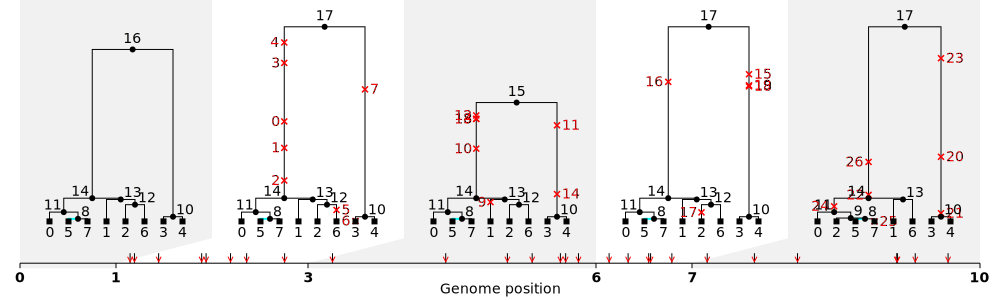

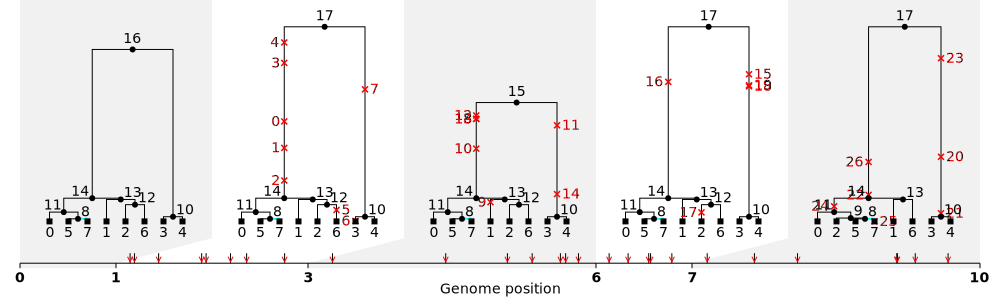

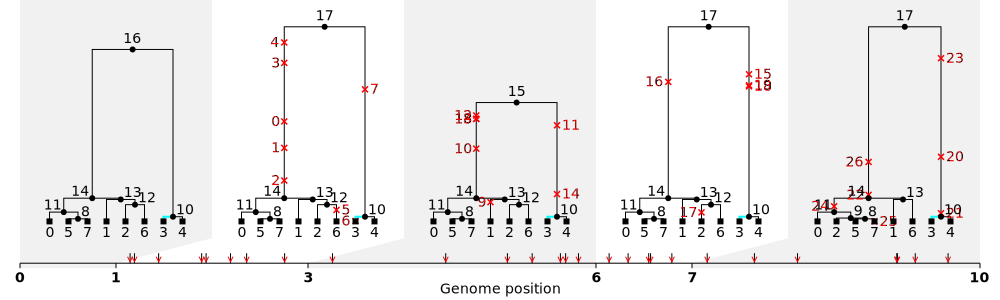

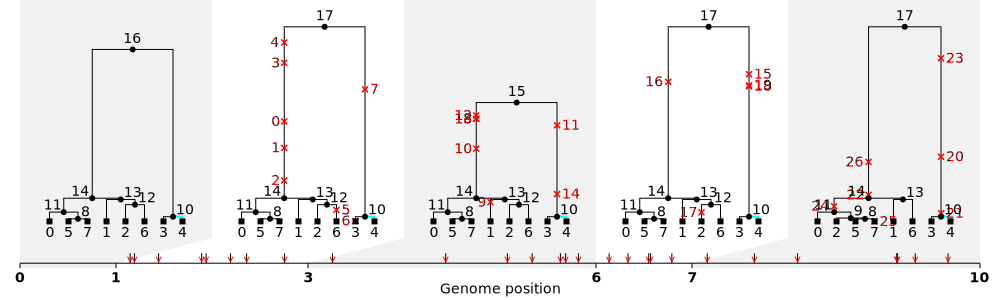

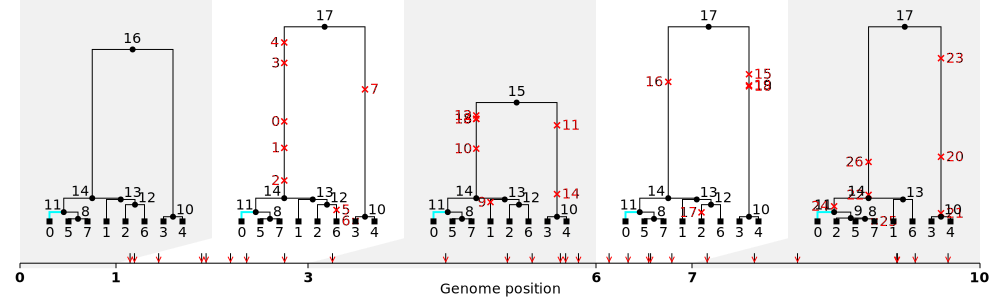

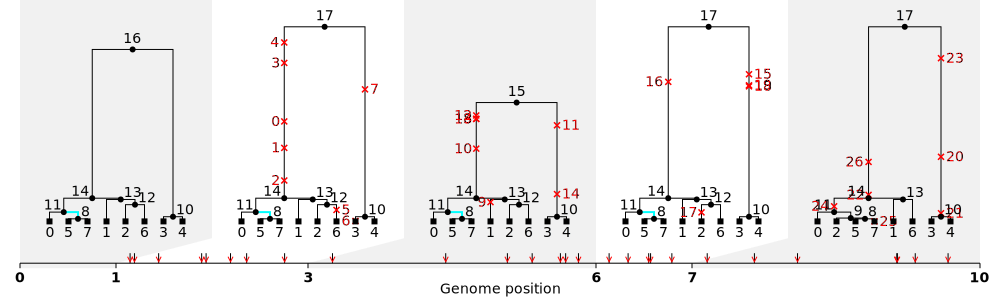

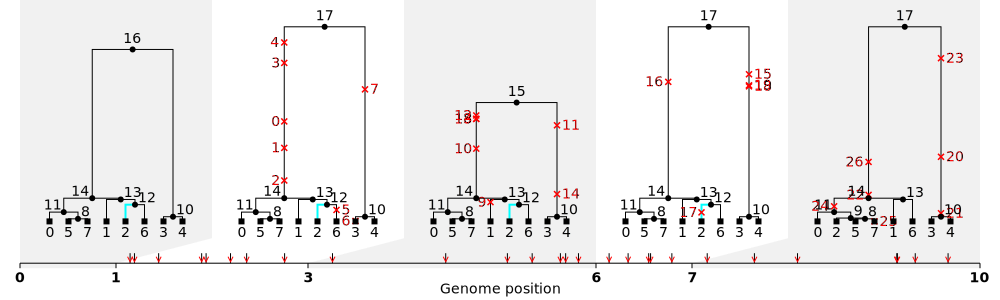

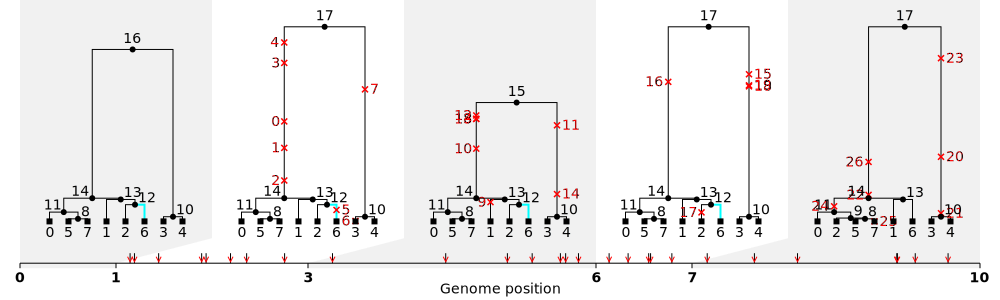

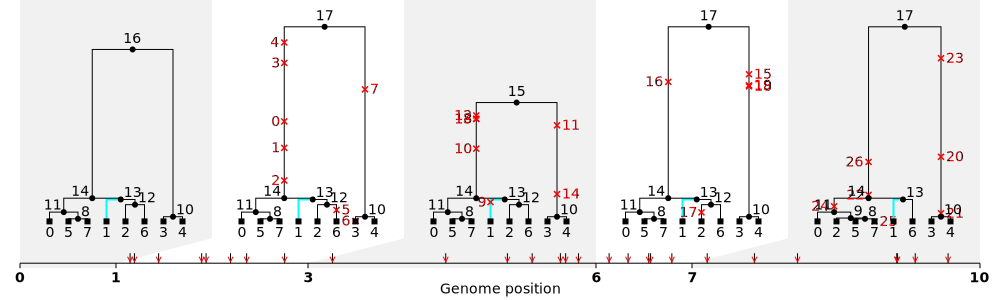

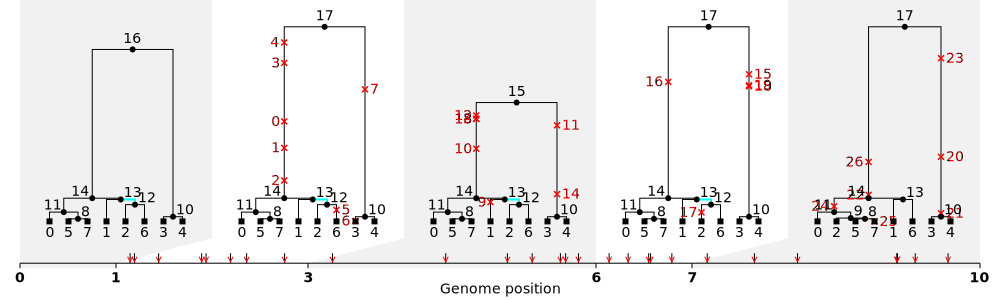

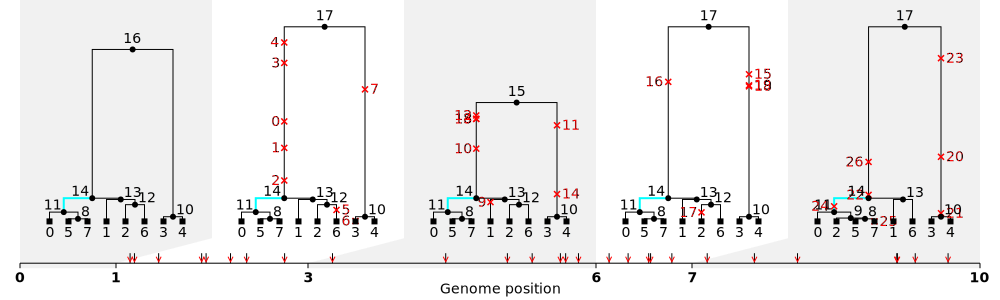

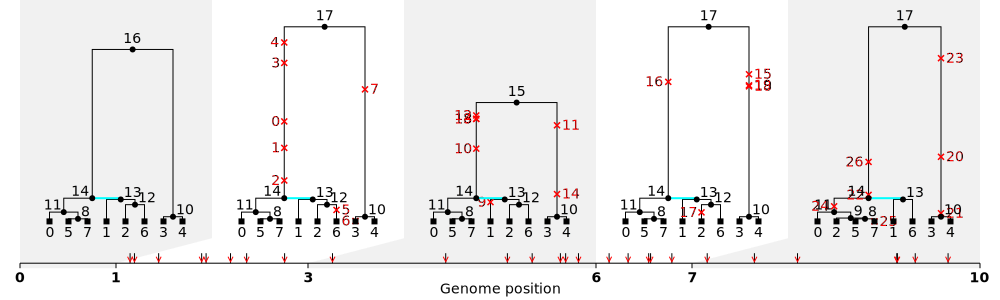

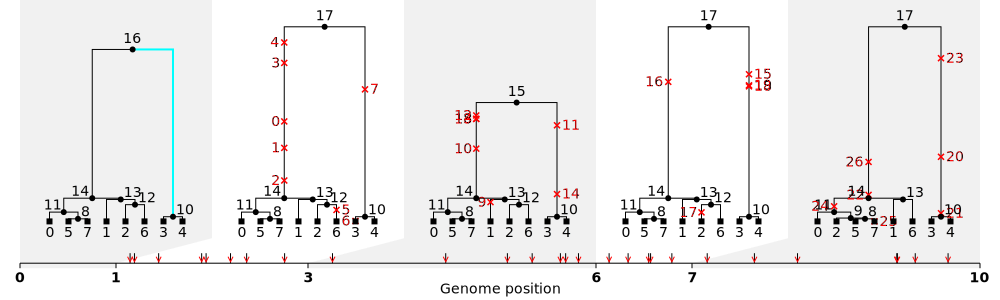

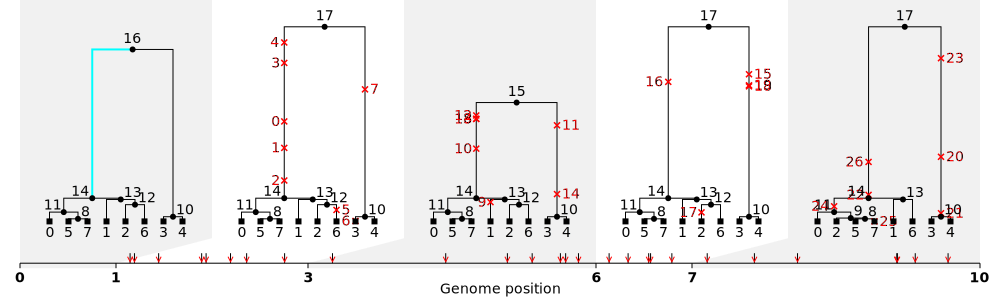

tree 0 ==================================
END    ==================================
site 0 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 0 mut 1 []
site 1 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 1 mut 1 []
site 2 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 2 mut 1 []
site 3 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 3 mut 1 []
site 4 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 4 mut 1 []
site 5 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 5 mut 1 []
site 6 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 6 mut 1 []
site 7 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 7 mut 1 []
site 8 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 8 mut 1 []
site 9 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 9 mut 1 []
site 10 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 10 mut 1 []
site 11 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 11 mut 1 []
site 12 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 12 mut 1 []
site 13 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 13 mut 1 []
site 14 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 14 mut 1 []
site 15 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
site 15 mut 1 []
site 16 mut 0 [0, 1, 2, 3, 4, 5, 6, 7]
s

In [197]:
from IPython import display

I = ts.indexes_edge_insertion_order
O = ts.indexes_edge_removal_order
tj = 0
tk = 0
t_left = 0
tree_index = 0

parent = -np.ones(ts.num_nodes, dtype=np.int32)
left_child = -np.ones(ts.num_nodes, dtype=np.int32)
right_child = -np.ones(ts.num_nodes, dtype=np.int32)
left_sib = -np.ones(ts.num_nodes, dtype=np.int32)
right_sib = -np.ones(ts.num_nodes, dtype=np.int32)

num_sample_chunks = int(ts.num_samples // BITMASK_CHUNK_SIZE) + 1

muts_per_site = [len(site.mutations) + 1 for site in ts.sites()]
offsets = np.array([0] + muts_per_site[:-1])
offsets = offsets.cumsum()
state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)
num_alleles = np.zeros(ts.num_sites, np.uint32)

for o in offsets:
    add_samples_to_array(state[o], map(np.uint64, ts.samples()))

while (tj < ts.num_edges) or (t_left < ts.sequence_length):
    while (tk < ts.num_edges) and (ts.edges_right[O[tk]] == t_left):
        h = O[tk]
        tk += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]

        while (v != -1):
            # print(t_left)
            display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: red; stroke-width: 2px}}'))

            if left_sib[u] == -1:
                left_child[v] = right_sib[u]
            else:
                right_sib[left_sib[u]] = right_sib[u]
            if right_sib[u] == -1:
                right_child[v] = left_sib[u]
            else:
                left_sib[right_sib[u]] = left_sib[u]
            left_sib[u] = -1
            right_sib[u] = -1

            v = parent[v]
        parent[u] = -1
    while (tj < ts.num_edges) and (ts.edges_left[I[tj]] == t_left):
        h = I[tj]
        tj += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]
        parent[u] = v
        while (v != -1):
            # print(t_left)
            display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: cyan; stroke-width: 2px}}'))

            c = right_child[v]
            if c == -1:
                left_child[v] = u
                left_sib[u] = -1
                right_sib[u] = -1
            else:
                right_sib[c] = u
                left_sib[u] = c
                right_sib[u] = -1
            right_child[v] = u

            v = parent[v]

    t_right = ts.sequence_length
    if (tj < ts.num_edges):
        t_right = min(t_right, ts.edges_left[I[tj]])
    if (tk < ts.num_edges):
        t_right = min(t_right, ts.edges_right[O[tk]])

#     max_muts = get_max_mutations(ts.at_index(tree_index))  # there is an index for this in c
#     state = np.zeros((num_sample_chunks, ts.at_index(tree_index).num_sites, max_muts + 1), dtype=np.uint64)
#     # state[sample_chunk, site, mutation]
#     mutation_edge = np.array([
#         m.edge for s in ts.at_index(tree_index).sites() for m in s.mutations
#     ], dtype=np.int32)  # index sites for tree directly in c

#     # Initialize all counts in the ancestral state
#     for sample in ts.samples():
#         for site in ts.at_index(tree_index).sites():
#             add_sample_to_array(state[:, site.id, 0], np.uint64(sample))
    print('tree', tree_index, '==================================')

    # muts_per_site = [len(site.mutations) + 1 for site in ts.at_index(tree_index).sites()]
    # offsets = np.array([0] + muts_per_site[:-1], np.uint32)
    # state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)


    for site in ts.at_index(tree_index).sites():
        allele_states = [site.ancestral_state]
        allele = 0
        for mutation in site.mutations:
            if mutation.derived_state in allele_states:
                allele = allele_states.index(mutation.derived_state)
            else:
                allele_states.append(mutation.derived_state)
                allele = len(allele_states) - 1

            to_add = []
            for n in postorder_traversal(mutation.node, left_child, right_child):
                if ts.node(n).flags & 1:
                    to_add.append(np.uint64(n))
            add_samples_to_array(state[offsets[site.id] + allele], to_add)

            alt_allele = allele_states.index(site.ancestral_state)
            if mutation.parent != tskit.NULL:
                alt_allele = allele_states.index(site.mutations[mutation.parent - site.mutations[0].id].derived_state)
            subtract_sample_arrays(state[offsets[site.id] + alt_allele], state[offsets[site.id] + allele], num_sample_chunks)
            print(site.id, mutation.id, offsets[site.id] + allele, offsets[site.id] + alt_allele, to_add)

    # if tree_index == 1:
    #     break
    break
    t_left = t_right
    tree_index += 1


print('END    ==================================')

s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print('site', s, 'mut', i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

In [16]:
hex(-1)

'-0x1'

In [17]:
np.int64(0xff)

255

In [50]:
from IPython import display

I = ts.indexes_edge_insertion_order
O = ts.indexes_edge_removal_order
tj = 0
tk = 0
t_left = 0
tree_index = 0

parent = -np.ones(ts.num_nodes, dtype=np.int32)
left_child = -np.ones(ts.num_nodes, dtype=np.int32)
right_child = -np.ones(ts.num_nodes, dtype=np.int32)
left_sib = -np.ones(ts.num_nodes, dtype=np.int32)
right_sib = -np.ones(ts.num_nodes, dtype=np.int32)

num_sample_chunks = int(ts.num_samples // BITMASK_CHUNK_SIZE) + 1

muts_per_site = [len(site.mutations) + 1 for site in ts.sites()]
offsets = np.array([0] + muts_per_site[:-1])
offsets = offsets.cumsum()
state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)
num_alleles = np.zeros(ts.num_sites, np.uint32)

for o in offsets:
    add_samples_to_array(state[o], map(np.uint64, ts.samples()))
while (tj < ts.num_edges) or (t_left < ts.sequence_length):
    while (tk < ts.num_edges) and (ts.edges_right[O[tk]] == t_left):
        h = O[tk]
        tk += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]

        while (v != -1):
            # print(t_left)
            # display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: red; stroke-width: 2px}}'))

            if left_sib[u] == -1:
                left_child[v] = right_sib[u]
            else:
                right_sib[left_sib[u]] = right_sib[u]
            if right_sib[u] == -1:
                right_child[v] = left_sib[u]
            else:
                left_sib[right_sib[u]] = left_sib[u]
            left_sib[u] = -1
            right_sib[u] = -1

            v = parent[v]
        parent[u] = -1
    while (tj < ts.num_edges) and (ts.edges_left[I[tj]] == t_left):
        h = I[tj]
        tj += 1
        u = ts.edges_child[h]
        v = ts.edges_parent[h]
        parent[u] = v
        while (v != -1):
            # print(t_left)
            # display.display(ts.draw_svg(size=(1000, 300), style=f'.a{v}.n{u} > .edge {{stroke: cyan; stroke-width: 2px}}'))

            c = right_child[v]
            if c == -1:
                left_child[v] = u
                left_sib[u] = -1
                right_sib[u] = -1
            else:
                right_sib[c] = u
                left_sib[u] = c
                right_sib[u] = -1
            right_child[v] = u

            v = parent[v]

    t_right = ts.sequence_length
    if (tj < ts.num_edges):
        t_right = min(t_right, ts.edges_left[I[tj]])
    if (tk < ts.num_edges):
        t_right = min(t_right, ts.edges_right[O[tk]])

    print('tree', tree_index, '==================================')

    node_to_mut = dict()
    for i, row in enumerate(ts.at_index(tree_index).mutations()):
        node_to_mut.setdefault(row.node, list()).append(i)

    if node_to_mut:
        stack = [max(node_to_mut)]
    else:
        stack = []
    first_curr_node = 2 * -np.ones((ts.at_index(tree_index).num_mutations, 2), dtype=np.int8)
    mut_samples = np.zeros((ts.at_index(tree_index).num_mutations, num_sample_chunks), np.uint64)
    print(node_to_mut)

    # preorder traversal
    while stack:
        node = stack.pop()
        # print('N---', node)
        if node in node_to_mut:
            for mut in node_to_mut[node]:
                first_curr_node[mut, 0] = node
                if ts.node(node).flags & 1:
                    add_sample_to_array(mut_samples[mut], np.uint64(node))
        for i, s in enumerate(first_curr_node):
            if s[0] != -2:
                if (s[1] == parent[node] or s[1] == left_sib[node]):
                    s[1] = node
                    if ts.node(node).flags & 1:
                        add_sample_to_array(mut_samples[i], np.uint64(node))
                elif s[0] == parent[node]:
                    s[1] = node
                    if ts.node(node).flags & 1:
                        add_sample_to_array(mut_samples[i], np.uint64(node))
        u = right_child[node]
        while u != tskit.NULL:
            stack.append(u)
            u = left_sib[u]
    # print('fcn', '\n', first_curr_node)
    # print('parent', '\n', parent)

    for m in mut_samples:
        print(m, list(get_samples_from_array(m, num_sample_chunks)))

    i = 0
    for site in ts.at_index(tree_index).sites():
        allele_states = [site.ancestral_state]
        allele = 0
        for mutation in site.mutations:
            if mutation.derived_state in allele_states:
                allele = allele_states.index(mutation.derived_state)
            else:
                allele_states.append(mutation.derived_state)
                allele = len(allele_states) - 1

            add_sample_arrays(state[offsets[site.id] + allele], mut_samples[i], num_sample_chunks)
            print('add', allele, state.reshape(-1))

            alt_allele = allele_states.index(site.ancestral_state)
            if mutation.parent != tskit.NULL:
                alt_allele = allele_states.index(site.mutations[mutation.parent - site.mutations[0].id].derived_state)
                # print('here', allele, alt_allele, offsets[site.id], allele_states)
            subtract_sample_arrays(state[offsets[site.id] + alt_allele], state[offsets[site.id] + allele], num_sample_chunks)
            print('sub', alt_allele, state.reshape(-1))
            i += 1
        print('----')

    # if tree_index == 1:
    #     break
    # break
    t_left = t_right
    tree_index += 1


print('END    ==================================')

s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print('site', s, 'mut', i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

tree 0 ==================================
{9: [0], 7: [1, 3], 3: [2]}
[15] [0, 1, 2, 3]
[3] [0, 1]
[8] [3]
[3] [0, 1]
add 1 [63 15  0  0 63  0 63  0 63  0]
sub 0 [48 15  0  0 63  0 63  0 63  0]
add 2 [48 15  3  0 63  0 63  0 63  0]
sub 1 [48 12  3  0 63  0 63  0 63  0]
add 0 [56 12  3  0 63  0 63  0 63  0]
sub 1 [56  4  3  0 63  0 63  0 63  0]
----
add 1 [56  4  3  0 63  3 63  0 63  0]
sub 0 [56  4  3  0 60  3 63  0 63  0]
----
tree 1 ==================================
{13: [0]}
[15] [0, 1, 2, 3]
add 1 [56  4  3  0 60  3 63 15 63  0]
sub 0 [56  4  3  0 60  3 48 15 63  0]
----
tree 2 ==================================
{17: [0]}
[31] [0, 1, 2, 3, 4]
add 1 [56  4  3  0 60  3 48 15 63 31]
sub 0 [56  4  3  0 60  3 48 15 32 31]
----
END    ==================================
site 0 mut 0 [3, 4, 5]
site 0 mut 1 [2]
site 0 mut 2 [0, 1]
site 0 mut 3 []
site 1 mut 0 [2, 3, 4, 5]
site 1 mut 1 [0, 1]
site 2 mut 0 [4, 5]
site 2 mut 1 [0, 1, 2, 3]
site 3 mut 0 [5]
site 3 mut 1 [0, 1, 2, 3, 4]


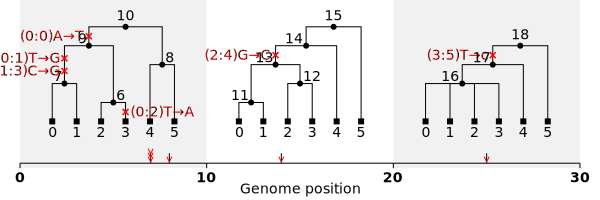

In [51]:
ts.draw_svg(mutation_labels=mut_labels)

In [43]:
print(state.reshape(-1))

[ 24 231   0   0   0   0 191  64   0   0  24 231 253   2  24   0   0 231
   0   0  28 227   0   0   0   0 255   0   0 255   0 127   0   0 128   0]


In [20]:
muts_per_site

[4, 2, 2, 2]

In [21]:
ts.num_samples

6

In [22]:
bin(~(~np.uint64(0) >> np.uint64(2)))

'0b1100000000000000000000000000000000000000000000000000000000000000'

In [246]:
bin(~np.uint64(0) >> np.uint64(2))

'0b11111111111111111111111111111111111111111111111111111111111111'

In [228]:
96 >> 5

3

In [263]:
bin(~(~np.uint64(0) << (np.uint64(ts.num_samples) % (np.uint64(1) << np.uint64(5)))))

'0b111111'

In [ ]:
ts.num_samples

6

In [234]:
96%32

0

In [229]:
32 * 3

96

In [220]:
98 // 5

19

In [270]:
state

array([[63],
       [ 0],
       [ 0],
       [ 0],
       [63],
       [ 0],
       [63],
       [ 0],
       [63],
       [ 0]], dtype=uint64)

In [273]:
list(ts.sites())

[Site(id=0, position=7.0, ancestral_state='A', mutations=[Mutation(id=0, site=0, node=9, derived_state='T', parent=-1, metadata=b'', time=nan, edge=25), Mutation(id=1, site=0, node=7, derived_state='G', parent=0, metadata=b'', time=nan, edge=19), Mutation(id=2, site=0, node=3, derived_state='A', parent=0, metadata=b'', time=nan, edge=1)], metadata=b''),
 Site(id=1, position=8.0, ancestral_state='C', mutations=[Mutation(id=3, site=1, node=7, derived_state='G', parent=-1, metadata=b'', time=nan, edge=19)], metadata=b''),
 Site(id=2, position=14.0, ancestral_state='G', mutations=[Mutation(id=4, site=2, node=13, derived_state='C', parent=-1, metadata=b'', time=nan, edge=21)], metadata=b''),
 Site(id=3, position=25.0, ancestral_state='T', mutations=[Mutation(id=5, site=3, node=17, derived_state='c', parent=-1, metadata=b'', time=nan, edge=23)], metadata=b'')]

In [272]:
state.shape

(10, 1)

In [271]:
sum(offsets)

18

In [292]:
offsets

array([0, 4, 6, 8])

In [196]:
node_to_mut

{17: [0]}

In [24]:
state

array([[56],
       [ 4],
       [ 3],
       [ 0],
       [60],
       [ 3],
       [48],
       [15],
       [32],
       [31]], dtype=uint64)

In [309]:
offsets

array([0, 4, 6, 8])

In [73]:
# for n in postorder_traversal(6, left_child, right_child):
#     if ts.node(n) & 1:
#         for site in ts.at_index(tree_index.sites()):
#             add_sample_to_array(, n)
        

In [95]:
# for site in ts.at_index(tree_index).sites():
#     anc = site.ancestral_state

#     for mutation in site.mutations:
#         alt = 0 if mutation.parent == tskit.NULL else mutation.parent
#         to_add = []
#         for n in postorder_traversal(mutation.node, left_child, right_child):
#             if ts.node(n).flags & 1:
#                 to_add.append(np.uint64(n))
#         print(site.id, mutation.id, alt, to_add)
#         add_samples_to_array(state[:, site.id, mutation.id], to_add)
#         subtract_sample_arrays(state[:, site.id, alt], state[:, site.id, mutation.id], num_sample_chunks)

In [232]:
muts_per_site = [len(site.mutations) + 1 for site in ts.at_index(tree_index).sites()]
offsets = np.array([0] + muts_per_site[:-1], np.uint32)
state = np.zeros((sum(muts_per_site), num_sample_chunks), dtype=np.uint64)

for o in offsets:
    add_samples_to_array(state[o], map(np.uint64, ts.samples()))

for site in ts.at_index(tree_index).sites():
    allele_states = [site.ancestral_state]
    allele = 0
    for mutation in site.mutations:
        if mutation.derived_state in allele_states:
            allele = allele_states.index(mutation.derived_state)
        else:
            allele_states.append(mutation.derived_state)
            allele = len(allele_states) - 1

        to_add = []
        for n in postorder_traversal(mutation.node, left_child, right_child):
            if ts.node(n).flags & 1:
                to_add.append(np.uint64(n))
        add_samples_to_array(state[offsets[site.id] + allele], to_add)

        alt_allele = allele_states.index(site.ancestral_state)
        if mutation.parent != tskit.NULL:
            alt_allele = allele_states.index(site.mutations[mutation.parent - site.mutations[0].id].derived_state)
        subtract_sample_arrays(state[offsets[site.id] + alt_allele], state[offsets[site.id] + allele], num_sample_chunks)
        print(site.id, mutation.id, allele, alt_allele, allele_states, to_add)

print('----------------')

s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print(s, i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

0 0 1 0 ['A', 'T'] [2, 0, 1]
0 1 2 1 ['A', 'T', 'G'] [0, 1]
1 2 1 0 ['C', 'G'] [0, 1]
----------------
0 0 [3]
0 1 [2]
0 2 [0, 1]
1 0 [2, 3]
1 1 [0, 1]


In [233]:
s = 0
for i, r in enumerate(state):
    if i == offsets[s + 1] if s + 1 < len(offsets) else False:
        s += 1
    print(s, i - offsets[s], list(get_samples_from_array(r, num_sample_chunks)))

0 0 [3]
0 1 [2]
0 2 [0, 1]
1 0 [2, 3]
1 1 [0, 1]


In [234]:
state

array([[ 8],
       [ 4],
       [ 3],
       [12],
       [ 3]], dtype=uint64)

In [130]:
list(ts.at_index(tree_index).sites())

[Site(id=0, position=7.0, ancestral_state='A', mutations=[Mutation(id=0, site=0, node=5, derived_state='T', parent=-1, metadata=b'', time=nan, edge=11), Mutation(id=1, site=0, node=4, derived_state='G', parent=0, metadata=b'', time=nan, edge=7)], metadata=b''),
 Site(id=1, position=8.0, ancestral_state='C', mutations=[Mutation(id=2, site=1, node=4, derived_state='G', parent=-1, metadata=b'', time=nan, edge=7)], metadata=b'')]

In [136]:
ts.site(0).mutations[ts.site(0).mutations[1].parent - ts.site(0).mutations[0].id].derived_state

'T'

In [143]:
state

array([[0],
       [4],
       [3],
       [0],
       [3]], dtype=uint64)

array([0], dtype=uint64)

In [105]:
offsets

array([3, 2], dtype=uint32)

In [81]:
list(ts.at_index(tree_index).sites())

[Site(id=0, position=7.0, ancestral_state='A', mutations=[Mutation(id=0, site=0, node=5, derived_state='T', parent=-1, metadata=b'', time=nan, edge=11), Mutation(id=1, site=0, node=4, derived_state='G', parent=0, metadata=b'', time=nan, edge=7)], metadata=b''),
 Site(id=1, position=8.0, ancestral_state='C', mutations=[Mutation(id=2, site=1, node=4, derived_state='G', parent=-1, metadata=b'', time=nan, edge=7)], metadata=b'')]

In [ ]:
for n 